In [22]:

import pandas as pd
df = pd.read_csv('laptop_final.csv')
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'ppi', 'Cpu Brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Gpu brand', 'os'],
      dtype='object')

# Analysis

In [9]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral5
from bokeh.io import output_file
import pandas as pd
from bokeh.layouts import gridplot
from bokeh.embed import components
from bokeh.resources import CDN
from bokeh.palettes import viridis

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter
from bokeh.palettes import Category20

# Create a new figure object
p = figure(height=400, width=600, title='Price Most Prefered')

# Compute the histogram using NumPy
hist, edges = np.histogram(data['Price'], bins=10)

# Compute the center of each bin
x = (edges[:-1] + edges[1:]) / 2

# Define a list of colors
colors = Category20[10]

# Plot the histogram bars using the Quad glyph with different colors
for i in range(len(hist)):
    p.quad(top=hist[i], bottom=0, left=edges[i], right=edges[i+1], fill_color=colors[i % len(colors)], line_color='black')

# Customize the plot
p.title.text_font_size = '16pt'
p.title.align = 'center'
p.xaxis.axis_label = 'Price'
p.yaxis.axis_label = 'Count'
formatter = NumeralTickFormatter(format='0,0')
p.background_fill_color = "#E0F9F2"
p.yaxis.formatter = formatter

# Show the plot
show(p)


In [ ]:
sns.histplot(df['Price'])
plt.show()

How Price vary with different brands of Laptop?

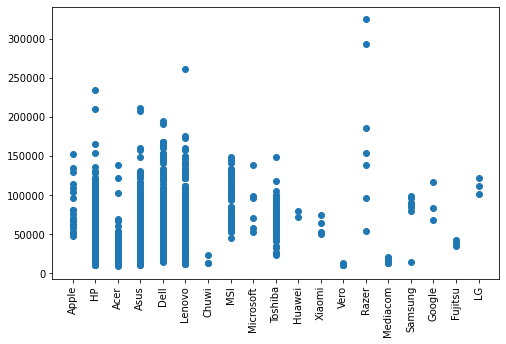

In [13]:
plt.figure(figsize=[8, 5])
plt.scatter(x=data['Company'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

How price vary with Ram of Laptop?

In [14]:
from bokeh.plotting import figure, show
from bokeh.models import NumeralTickFormatter

# Create a new figure object
p = figure(x_range=makers2, height=500, width=800, title='Price vs. Ram')


ram = data['Ram'].value_counts()
makers = ram.index.tolist()
# counts = ram.values.tolist()
sorted_list = sorted(makers, reverse=True)
# Plot the bars
p.vbar(x=data['Ram'], top=data['Price'], width=0.5)

# Customize the plot
p.xaxis.axis_label = 'Ram'
p.yaxis.axis_label = 'Price'
p.xaxis.major_label_orientation = 'vertical'
formatter = NumeralTickFormatter(format='Nu.0,0')
p.yaxis.formatter = formatter

# Show the plot
show(p)


NameError: name 'makers2' is not defined

In [ ]:
plt.figure(figsize=[8, 5])
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Most used Gpu brand by Laptops

In [38]:
gpu=df['Gpu brand'].value_counts()

from math import pi
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

x =gpu
data1 = pd.Series(x).reset_index(name='value').rename(columns={'index': 'Gpu'})
data1 = data1.rename(columns={'Gpu brand': 'Gpu'})
data1['angle'] = data1['value']/data1['value'].sum() * 2*pi
data1['color'] = Category20c[len(x)]

p = figure(height=600, width=600, title="Most used Gpu brand by Laptops.", toolbar_location=None,
           tools="hover", tooltips="@Gpu: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Gpu', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
p.background_fill_color = "#E0F9F2"
p.title.text_font_size = '12pt'
p.title.align = 'center'
p.xaxis.minor_tick_line_color = "black"
show(p)

In [36]:
x =gpu
data1 = pd.Series(x).reset_index(name='value')
data1 = data1.rename(columns={'Gpu brand': 'Gpu'})

In [37]:
data1

,Gpu,value
0,Intel,722
1,Nvidia,400
2,AMD,180


In [24]:
import pandas as pd
from math import pi
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20c
from bokeh.plotting import figure

# Read the CSV file into a DataFrame
df = pd.read_csv('laptop_final.csv')

# Count the occurrences of each GPU brand
gpu_counts = df['Gpu brand'].value_counts()

# Create a DataFrame for plotting
data = pd.DataFrame(gpu_counts).reset_index()
data.columns = ['Gpu', 'value']

# Calculate angle and color for each GPU brand
data['angle'] = data['value'] / data['value'].sum() * 2*pi
data['color'] = Category20c[len(data)]

# Create a ColumnDataSource
source = ColumnDataSource(data)

# Create the figure
p = figure(height=600, width=600, title="Most Used GPU Brand by Laptops",
           toolbar_location=None, tools="hover",
           tooltips="@Gpu: @value", x_range=(-0.5, 1.0))

# Plot the pie chart
p.wedge(x=0, y=1, radius=0.4,
        start_angle='angle', end_angle='angle',
        line_color="white", fill_color='color',
        legend_field='Gpu', source=source)

# Set visual properties
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
p.background_fill_color = "#E0F9F2"
p.title.text_font_size = '12pt'
p.title.align = 'center'
p.xaxis.minor_tick_line_color = "black"

# Display the pie chart
output_notebook()
show(p)


Loading BokehJS ...

In [ ]:
data1

In [16]:
gpu=data.loc[:, 'Gpu brand'].value_counts()

from math import pi
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

x =gpu

data1 = pd.Series(x).reset_index(name='value')
data1['angle'] = data1['value']/data1['value'].sum() * 2*pi
data1['color'] = Category20c[len(x)]

p = figure(height=500, width=900, title="Top 5 fuel used", toolbar_location=None,
           tools="hover", tooltips="@legend: @value", x_range=(-0.5, 1.0))
color = data1['color']
legend = data1['Gpu brand']
p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='legend', source=data)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
p.background_fill_color = "#E0F9F2"
p.title.text_font_size = '16pt'
p.title.align = 'center'
p.xaxis.minor_tick_line_color = "black"
show(p)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='color' [no close matches] {renderer: GlyphRenderer(id='p2067', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : LegendItem(id='p2071', ...)


In [21]:
data.columns

Index(['Gpu', 'value', 'angle', 'color'], dtype='object')

In [20]:
gpu=data.loc[:, 'Gpu brand'].value_counts()

from math import pi
from bokeh.palettes import Category20c
from bokeh.transform import cumsum

x =gpu
data = pd.Series(x).reset_index(name='value')
data = data.rename(columns={'Gpu brand': 'Gpu'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p1 = figure(height=600, width=850, title="Most used Gpu brand by Laptops.", toolbar_location=None,
           tools="hover", tooltips="@Gpu: @value", x_range=(-0.5, 1.0))

p1.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Gpu', source=data)

p1.axis.axis_label = None
p1.axis.visible = False
p1.grid.grid_line_color = None
p1.background_fill_color = "#E0F9F2"
p1.title.text_font_size = '16pt'
p1.title.align = 'center'
p1.xaxis.minor_tick_line_color = "black"
show(p1)

KeyError: 'Gpu brand'

In [ ]:

plt.figure(figsize=[8, 5])
plt.pie(df['Gpu brand'].value_counts(), autopct='%1.1f%%', labels=['Intel', 'Nvidia','AMD'])
plt.show()

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10

# Create a new figure object
p = figure(x_range=df['TypeName'].unique(), height=500, width=800, title='Price by TypeName')

# Define the color palette
colors = Category10[len(df['TypeName'].unique())]

# Plot the bars with different colors
p.vbar(x=df['TypeName'].value_counts().index, top=df['TypeName'].value_counts().values, width=0.5, color=colors)

# Customize the plot
p.xaxis.axis_label = 'TypeName'
p.yaxis.axis_label = 'Value count by Laptop TypeName'
p.xaxis.major_label_orientation = 'vertical'
p.title.align = 'center'
p.xaxis.major_label_orientation = 'vertical'

# Show the plot
output_notebook()  # Use this line if you are working in a Jupyter Notebook
show(p)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models.tools import ResetTool, PanTool, HoverTool
from bokeh.io import output_notebook
from bokeh.palettes import Category20

ddat1 = df['Company'].value_counts().reset_index()
ddat1
p1 = figure(x_range=ddat1['index'], width=900, height=550, title="Count of Laptops for each brand")

x=ddat1['index']
y=ddat1['Company']
p1.circle(ddat1['index'], ddat1.Company)

p1.grid.bounds = (4, 8)

p1.toolbar_location = 'above'
p1.toolbar.logo = None

p1.yaxis.major_label_orientation = "vertical"
p1.xaxis.axis_label = "Company"
p1.yaxis.axis_label = "Count"
p1.yaxis.axis_label_text_font_style = "bold"
p1.xaxis.axis_label_text_font_style = "bold"
p1.background_fill_color = "#E0F9F2"
p1.title.text_font_size = '16pt'
p1.title.align = 'center'

p1.tools = [PanTool(), ResetTool()]
hover = HoverTool(tooltips=[("Company", "@x"), ("Count", "@y")])
p1.add_tools(hover)

output_notebook()
show(p1)


In [ ]:
ddat1.columns

In [18]:
from bokeh.plotting import figure, show
from bokeh.models.tools import ResetTool, PanTool, HoverTool
from bokeh.io import output_notebook
from bokeh.palettes import Category20

ddat = data['Company'].value_counts().reset_index()
ddat.columns = ['Company', 'Count']

p1 = figure(x_range=ddat['Company'], height=400, width=600, title="Count of Laptops for each brand")
x=ddat['Company']
y=ddat['Count']
p1.circle(x,y)

p1.grid.bounds = (4, 8)

p1.toolbar_location = 'above'
p1.toolbar.logo = None

p1.yaxis.major_label_orientation = "vertical"
p1.xaxis.axis_label = "Company"
p1.yaxis.axis_label = "Count"
p1.yaxis.axis_label_text_font_style = "bold"
p1.xaxis.axis_label_text_font_style = "bold"
p1.background_fill_color = "#E0F9F2"
p1.title.text_font_size = '16pt'
p1.title.align = 'center'

p1.tools = [PanTool(), ResetTool()]
hover = HoverTool(tooltips=[("Company", "@x"), ("Count", "@y")])
p1.add_tools(hover)

output_notebook()  # Use this line if you are working in a Jupyter Notebook
show(p1)


Loading BokehJS ...